# 미세먼지 데이터 분석

## 1. 데이터 수집

 1. 에어코리아(https://www.airkorea.or.kr/index )에 접속.
 2. 메뉴에서‘통계정보’→ ‘최종확정자료다운로드’ 클릭.

 1. 기상청(https://data.kma.go.kr/cmmn/main.do)에 접속.
 2. 메뉴에서‘데이터’ 클릭.(회원가입필수)

## 2. 데이터 확인

In [126]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "../data/"

air_df = pd.read_excel(file_path + "airdata.xlsx")
display(air_df.head())

weather_df = pd.read_excel(file_path + "weather.xlsx")
display(weather_df.head())

,날짜,아황산가스,일산화탄소,오존,이산화질소,PM10,PM2.5
0,2025-06-01 01,0.0034,0.58,0.0280,0.0296,56.0,47.0
1,2025-06-01 02,0.0036,0.67,0.0236,0.0301,60.0,49.0
2,2025-06-01 03,0.0034,0.66,0.0226,0.0271,64.0,56.0
3,2025-06-01 04,0.0032,0.55,0.0174,0.0237,66.0,NaN
4,2025-06-01 05,0.0035,0.47,0.0188,0.0203,64.0,NaN


,지점,지점명,일시,기온(°C),풍속(m/s),강수량(mm),습도(%)
0,415,용산,2025-06-01 01:00:00,20.5,0.5,0.0,63
1,415,용산,2025-06-01 02:00:00,20.2,1.1,0.0,64
2,415,용산,2025-06-01 03:00:00,19.3,2.2,0.0,71
3,415,용산,2025-06-01 04:00:00,18.6,0.4,0.0,74
4,415,용산,2025-06-01 05:00:00,18.4,1.0,0.0,75


## 3. 데이터 가공

### 3-1. 데이터 이름 영어로 변환

In [127]:
air_df.rename(columns={"날짜":"date","아황산가스":"so2","일산화탄소":"co","오존":"o3","이산화질소":"no2"}, inplace=True)
display(air_df.head())

weather_df.rename(columns={"지점":"center","지점명":"area","일시":"date","기온(°C)":"temperature","풍속(m/s)":"wind_speed","강수량(mm)":"rain","습도(%)":"humidity"}, inplace=True)
display(weather_df.head())

,date,so2,co,o3,no2,PM10,PM2.5
0,2025-06-01 01,0.0034,0.58,0.0280,0.0296,56.0,47.0
1,2025-06-01 02,0.0036,0.67,0.0236,0.0301,60.0,49.0
2,2025-06-01 03,0.0034,0.66,0.0226,0.0271,64.0,56.0
3,2025-06-01 04,0.0032,0.55,0.0174,0.0237,66.0,NaN
4,2025-06-01 05,0.0035,0.47,0.0188,0.0203,64.0,NaN


,center,area,date,temperature,wind_speed,rain,humidity
0,415,용산,2025-06-01 01:00:00,20.5,0.5,0.0,63
1,415,용산,2025-06-01 02:00:00,20.2,1.1,0.0,64
2,415,용산,2025-06-01 03:00:00,19.3,2.2,0.0,71
3,415,용산,2025-06-01 04:00:00,18.6,0.4,0.0,74
4,415,용산,2025-06-01 05:00:00,18.4,1.0,0.0,75


### 3-2. date컬럼 -> date 형식으로 변환

In [128]:
# 불필요한 문자 슬라이싱
air_df["date"] = air_df["date"].str[:11]
display(air_df.head())

# date 형식으로 변환
air_df["date"] = pd.to_datetime(air_df["date"])
print(air_df.dtypes)

air_df["year"] = air_df["date"].dt.year
air_df["month"] = air_df["date"].dt.month
air_df["day"] = air_df["date"].dt.day

display(air_df.head())
display(weather_df.head())

,date,so2,co,o3,no2,PM10,PM2.5
0,2025-06-01,0.0034,0.58,0.0280,0.0296,56.0,47.0
1,2025-06-01,0.0036,0.67,0.0236,0.0301,60.0,49.0
2,2025-06-01,0.0034,0.66,0.0226,0.0271,64.0,56.0
3,2025-06-01,0.0032,0.55,0.0174,0.0237,66.0,NaN
4,2025-06-01,0.0035,0.47,0.0188,0.0203,64.0,NaN


date     datetime64[ns]
so2             float64
co              float64
o3              float64
no2             float64
PM10            float64
PM2.5           float64
dtype: object


,date,so2,co,o3,no2,PM10,PM2.5,year,month,day
0,2025-06-01,0.0034,0.58,0.0280,0.0296,56.0,47.0,2025,6,1
1,2025-06-01,0.0036,0.67,0.0236,0.0301,60.0,49.0,2025,6,1
2,2025-06-01,0.0034,0.66,0.0226,0.0271,64.0,56.0,2025,6,1
3,2025-06-01,0.0032,0.55,0.0174,0.0237,66.0,NaN,2025,6,1
4,2025-06-01,0.0035,0.47,0.0188,0.0203,64.0,NaN,2025,6,1


,center,area,date,temperature,wind_speed,rain,humidity
0,415,용산,2025-06-01 01:00:00,20.5,0.5,0.0,63
1,415,용산,2025-06-01 02:00:00,20.2,1.1,0.0,64
2,415,용산,2025-06-01 03:00:00,19.3,2.2,0.0,71
3,415,용산,2025-06-01 04:00:00,18.6,0.4,0.0,74
4,415,용산,2025-06-01 05:00:00,18.4,1.0,0.0,75


### 3-3. 데이터 병합

**날짜 형식이 아래와 같이 같은 시각을 다르게 표시함.**   
하나는 10일 24시  
하나는 11일 00시  
따라서 date컬럼을 기준으로 병합할 수 없음.  
-> index 기반으로 병합하기로 결정함.

In [129]:
weather_df.drop(columns=["center", "area"], inplace=True)
display(weather_df.head())

,date,temperature,wind_speed,rain,humidity
0,2025-06-01 01:00:00,20.5,0.5,0.0,63
1,2025-06-01 02:00:00,20.2,1.1,0.0,64
2,2025-06-01 03:00:00,19.3,2.2,0.0,71
3,2025-06-01 04:00:00,18.6,0.4,0.0,74
4,2025-06-01 05:00:00,18.4,1.0,0.0,75


In [ ]:
# date 컬럼이 겹치므로 drop
weather_df.drop(columns=["date"], inplace=True)


# 병합 (행의 개수가 다르지만 기준 df를 기준으로 일치하지 않는 인덱스는 제외하고 반환함.)
df = weather_df.join(air_df)
df = df[["day", "temperature", "wind_speed", "rain", "humidity", "so2", "co", "o3", "no2", "PM10", "PM2.5"]]
display(df)

,day,temperature,wind_speed,rain,humidity,so2,co,o3,no2,PM10,PM2.5
0,1,20.5,0.5,0.0,63,0.0034,0.58,0.0280,0.0296,56.0,47.0
1,1,20.2,1.1,0.0,64,0.0036,0.67,0.0236,0.0301,60.0,49.0
2,1,19.3,2.2,0.0,71,0.0034,0.66,0.0226,0.0271,64.0,56.0
3,1,18.6,0.4,0.0,74,0.0032,0.55,0.0174,0.0237,66.0,NaN
4,1,18.4,1.0,0.0,75,0.0035,0.47,0.0188,0.0203,64.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
691,29,29.2,2.9,0.0,61,0.0034,0.32,0.0166,0.0069,8.0,2.0
692,29,28.4,2.5,0.0,68,0.0030,0.25,0.0114,0.0100,8.0,2.0
693,29,27.7,1.5,0.0,73,0.0025,0.22,0.0144,0.0092,9.0,5.0
694,29,27.1,1.8,0.0,76,0.0028,0.30,0.0142,0.0133,12.0,4.0


### 3-3. 결측치 처리

In [131]:
# 결측치 개수 확인
display(df.isna().sum())

day             0
temperature     0
wind_speed      0
rain            0
humidity        0
so2             6
co              6
o3              2
no2             6
PM10           23
PM2.5          15
dtype: int64

In [132]:
# method="pad" : 해당 행 바로 위 행의 값으로 채움
df = df.fillna(method="pad")

# 첫 번째 값이 NaN일 경우 아래와 같이 따로 처리해줌
# air_df = air_df.fillna(20, inplace=True)

display(df.isna().sum())
display(df.head())

C:\Users\AI-510-170\AppData\Local\Temp\ipykernel_14416\2275708598.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method="pad")


day            0
temperature    0
wind_speed     0
rain           0
humidity       0
so2            0
co             0
o3             0
no2            0
PM10           0
PM2.5          0
dtype: int64

,day,temperature,wind_speed,rain,humidity,so2,co,o3,no2,PM10,PM2.5
0,1,20.5,0.5,0.0,63,0.0034,0.58,0.0280,0.0296,56.0,47.0
1,1,20.2,1.1,0.0,64,0.0036,0.67,0.0236,0.0301,60.0,49.0
2,1,19.3,2.2,0.0,71,0.0034,0.66,0.0226,0.0271,64.0,56.0
3,1,18.6,0.4,0.0,74,0.0032,0.55,0.0174,0.0237,66.0,56.0
4,1,18.4,1.0,0.0,75,0.0035,0.47,0.0188,0.0203,64.0,56.0


### 3-4. rain 데이터 변경

In [133]:
# 0인 데이터가 의미를 가지도록 0.01로 변경
df["rain"] = df["rain"].replace([0], 0.01)
df["rain"].value_counts()

rain
0.01    654
0.50     16
1.00     11
2.50      4
2.00      4
1.50      2
5.00      1
8.00      1
5.50      1
4.50      1
3.00      1
Name: count, dtype: int64

## 4. 데이터 분석 및 시각화

### 4-1. 상관계수 계산

In [134]:
# 상관계수 계산
corr = df.corr()
display(corr)

# PM10 컬럼을 기준으로 각 컬럼들과의 상관관계를 확인 (sort_value : 값의 크기를 기준으로 정렬)
corr["PM10"].sort_values(ascending=False)

,day,temperature,wind_speed,rain,humidity,so2,co,o3,no2,PM10,PM2.5
day,1.000000,0.254338,-0.105426,0.091202,0.483803,-0.344951,-0.139499,-0.269613,-0.108442,-0.469582,-0.271554
temperature,0.254338,1.000000,0.288584,-0.033893,-0.485983,0.093259,0.004605,0.544156,-0.110754,0.087014,0.066227
wind_speed,-0.105426,0.288584,1.000000,0.186099,-0.187279,-0.163621,-0.344909,0.244567,-0.371690,-0.111800,-0.212871
rain,0.091202,-0.033893,0.186099,1.000000,0.252790,-0.175872,-0.225787,-0.168208,-0.121079,-0.245828,-0.207508
humidity,0.483803,-0.485983,-0.187279,0.252790,1.000000,-0.550397,-0.254844,-0.684396,-0.141179,-0.397672,-0.132629
so2,-0.344951,0.093259,-0.163621,-0.175872,-0.550397,1.000000,0.597284,0.324562,0.548687,0.527350,0.391411
co,-0.139499,0.004605,-0.344909,-0.225787,-0.254844,0.597284,1.000000,0.163995,0.739458,0.653675,0.626741
o3,-0.269613,0.544156,0.244567,-0.168208,-0.684396,0.324562,0.163995,1.000000,-0.148340,0.397987,0.212215
no2,-0.108442,-0.110754,-0.371690,-0.121079,-0.141179,0.548687,0.739458,-0.148340,1.000000,0.441608,0.411382
PM10,-0.469582,0.087014,-0.111800,-0.245828,-0.397672,0.527350,0.653675,0.397987,0.441608,1.000000,0.859841


PM10           1.000000
PM2.5          0.859841
co             0.653675
so2            0.527350
no2            0.441608
o3             0.397987
temperature    0.087014
wind_speed    -0.111800
rain          -0.245828
humidity      -0.397672
day           -0.469582
Name: PM10, dtype: float64

### 4-2. 히스토그램 시각화

array([[<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'wind_speed'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'so2'}>],
       [<Axes: title={'center': 'co'}>, <Axes: title={'center': 'o3'}>,
        <Axes: title={'center': 'no2'}>],
       [<Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'PM2.5'}>, <Axes: >]], dtype=object)

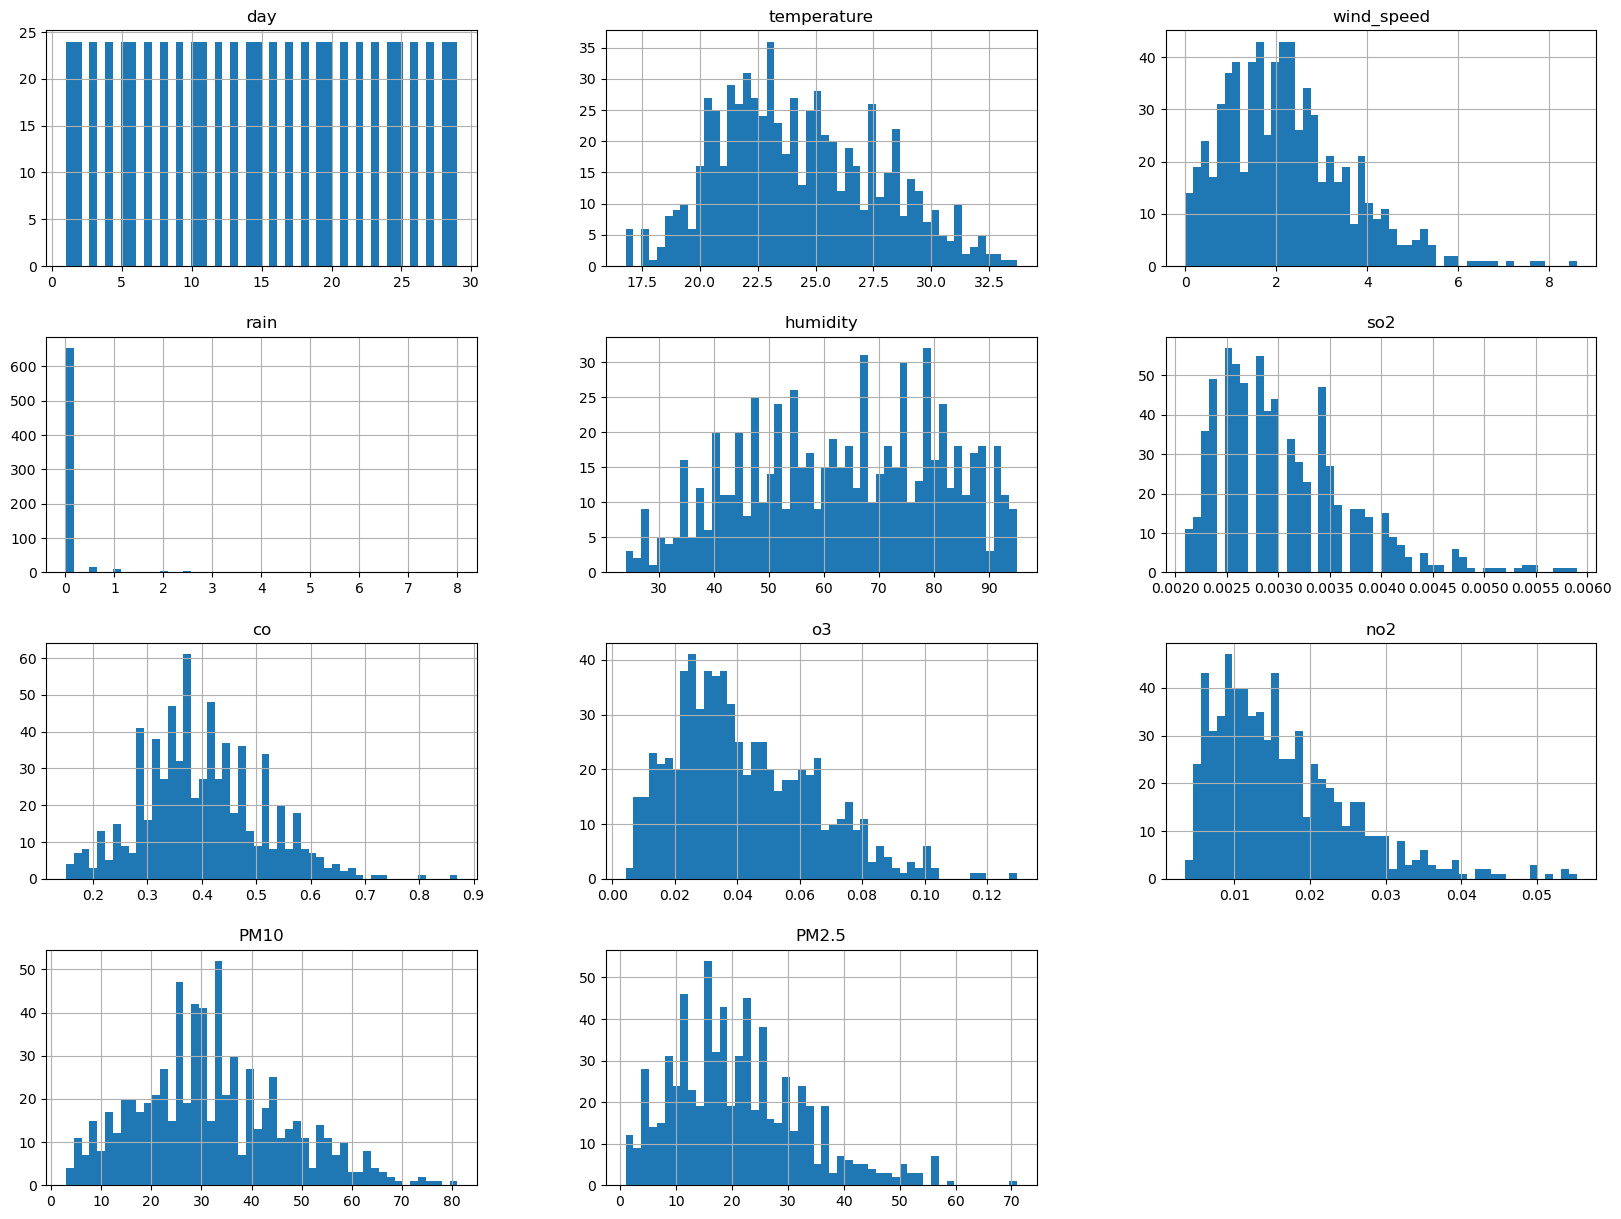

In [135]:
df.hist(bins=50, figsize=(20,15))

### 4-3. 막대 그래프 시각화

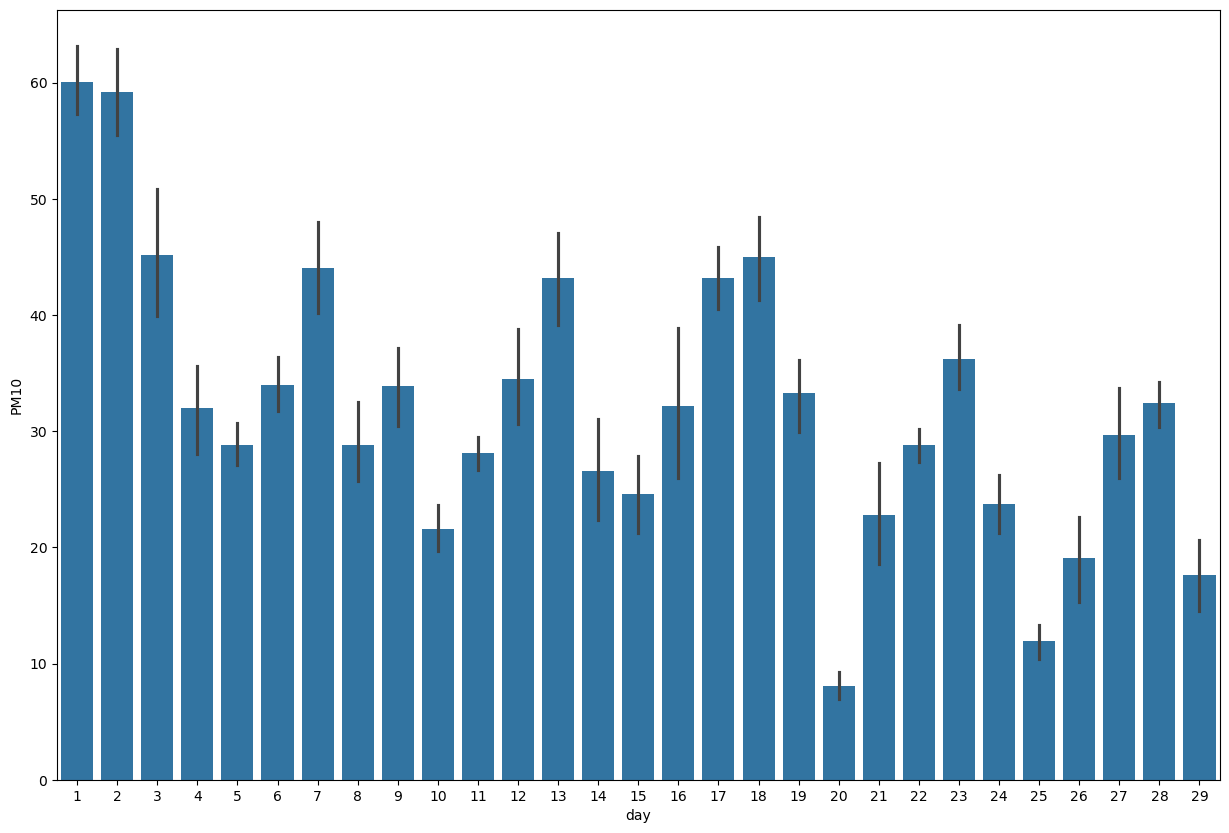

In [136]:
plt.figure(figsize=(15,10))
dayGraph = sns.barplot(x="day", y="PM10", data=df)
plt.xticks(rotation=0)
plt.show()

### 4-4. 히트맵 시각화

<Axes: >

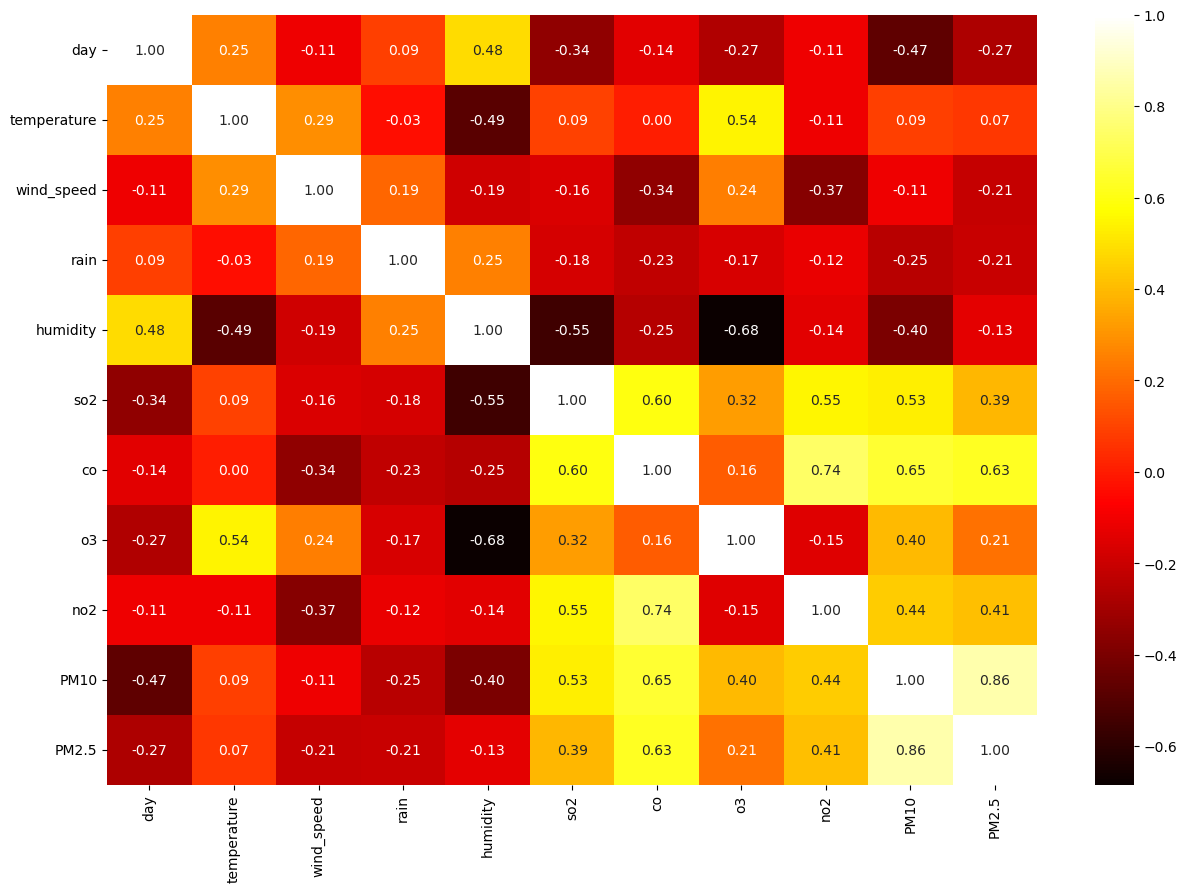

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data=corr, annot=True, fmt=".2f", cmap="hot")
plt.show()

### 4-5. 산점도 그래프 시각화

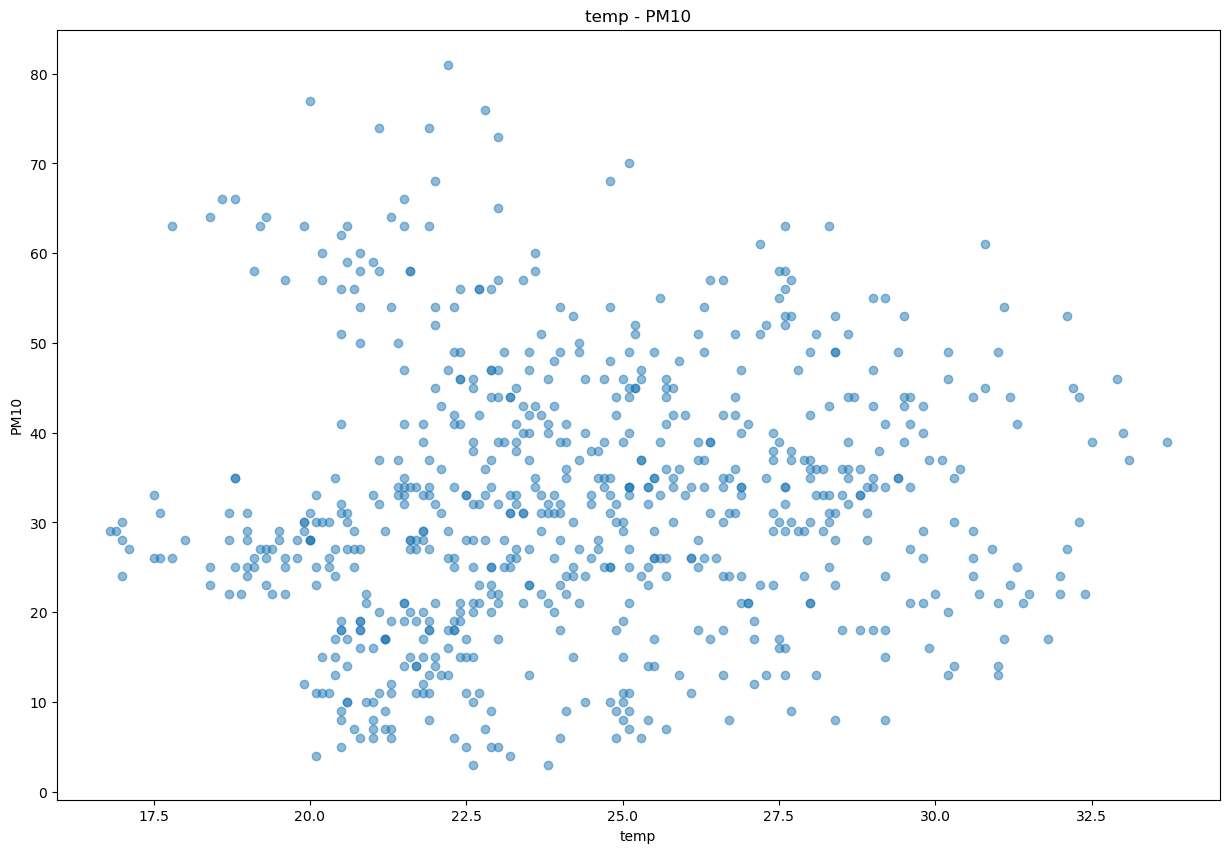

In [ ]:
# 온도 - PM10 관계
plt.figure(figsize=(15,10))
x = df["temperature"]
y = df["PM10"]
plt.plot(x,y,marker="o", linestyle="none", alpha=0.5)
plt.title("temp - PM10")
plt.xlabel("temp")
plt.ylabel("PM10")
plt.show()

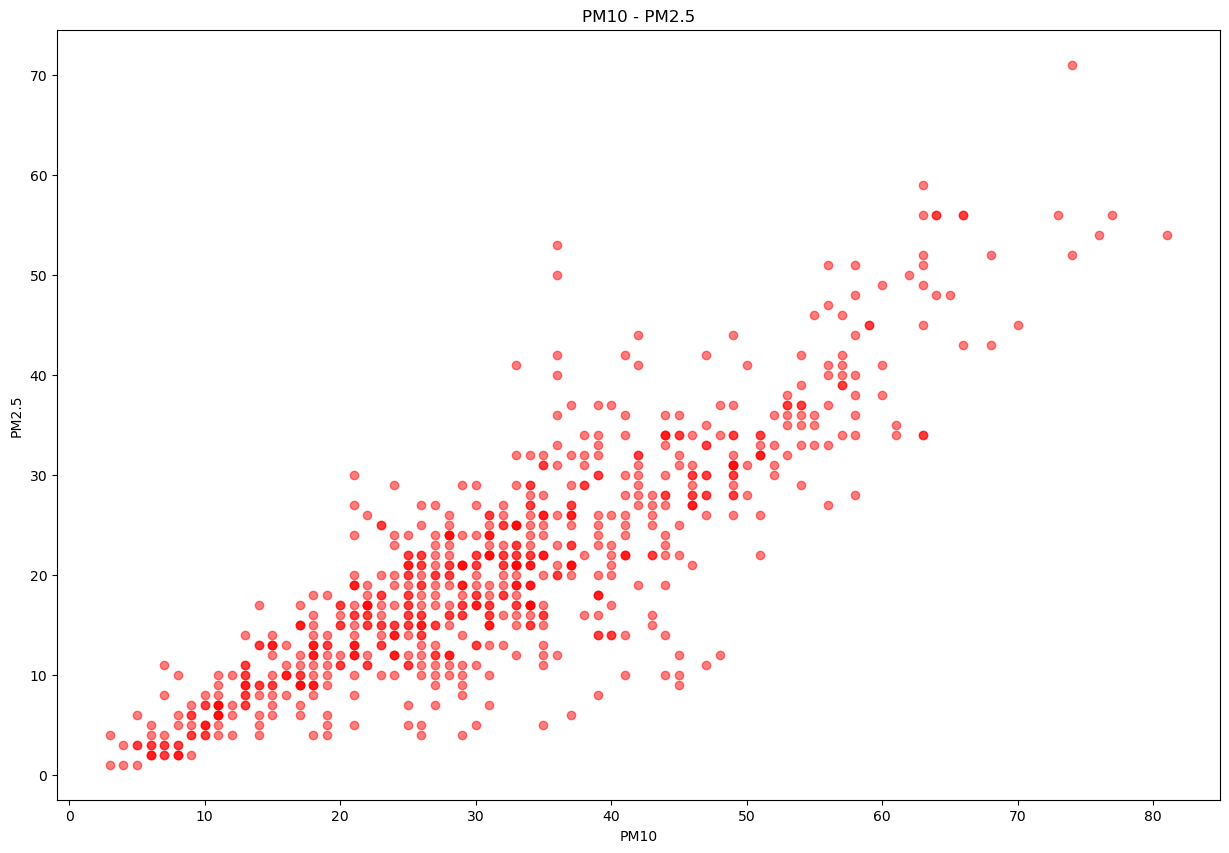

In [139]:
plt.figure(figsize=(15,10))
x = df["PM10"]
y = df["PM2.5"]
plt.plot(x,y,marker="o", linestyle="none", color="red", alpha=0.5)
plt.title("PM10 - PM2.5")
plt.xlabel("PM10")
plt.ylabel("PM2.5")
plt.show()